# Visualise Image Example

This notebook demonstrates how to display an image along with some contours, scalar overlays and bounding boxes.

In [18]:
from pathlib import Path
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

%matplotlib inline

from platipy.imaging.visualisation.tools import ImageVisualiser
from platipy.imaging.tests.pull_data import get_lung_data

In [19]:
images = get_lung_data(number_of_patients=1)
_, data_path = images.popitem()

2020-09-08 22:55:31.261 | DEBUG    | platipy.imaging.tests.pull_data:fetch_data:136 - Path exists: /platipy/platipy/imaging/tests/data/dynamic/lung/LCTSC-Train-S1-001, won't fetch data


In [20]:

image = sitk.ReadImage(os.path.join(data_path, "CT.nii.gz"))

structure_name_list = ["Heart","Esophagus","Lung_L","Lung_R", "SpinalCord"]
contours = {s: sitk.ReadImage(os.path.join(data_path, f"Struct_{s}.nii.gz")) for s in structure_name_list}

scalar_distance_in_heart = sitk.SignedMaurerDistanceMap(contours["Heart"], useImageSpacing=True, insideIsPositive=True)

label_stats_image_filter = sitk.LabelStatisticsImageFilter()
label_stats_image_filter.Execute(image, contours["Heart"])
bounding_box_heart = list(label_stats_image_filter.GetBoundingBox(1))
bounding_box_heart = [bounding_box_heart[i] for i in [0, 2, 4, 1, 3, 5]]
bounding_box_heart[3] -= bounding_box_heart[0]
bounding_box_heart[4] -= bounding_box_heart[1]
bounding_box_heart[5] -= bounding_box_heart[2]


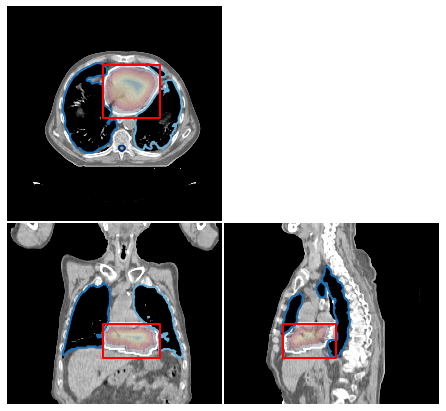

In [21]:
image_visualiser = ImageVisualiser(image, cut=(50,200,256))
image_visualiser.add_contour(contours)
image_visualiser.add_scalar_overlay(scalar_distance_in_heart, alpha=0.25, min_value=0.01)
image_visualiser.add_bounding_box(bounding_box_heart)
image_visualiser.show()